In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bikes.csv')

In [3]:
df.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [4]:
X = df.drop('cnt', axis=1)
y = df.loc[:,'cnt']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
rf = RandomForestRegressor(n_estimators=25, random_state=2)
 
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [7]:
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test, y_pred) ** (1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 52.97


### Visualizing features importances

In [8]:
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

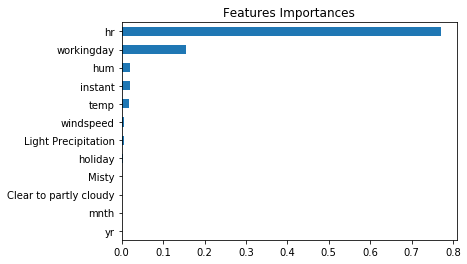

In [9]:
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.show()